In [1]:
import os
os.chdir('C:\\Users\\SHAILESH TIWARI\\Downloads\\regression problems\\black friday sales prediction')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999
#Kaggle divides the dataset already into Train and Test data
train = pd.read_csv("trains.csv")
test = pd.read_csv("tests.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
train.shape

(550068, 12)

In [7]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [8]:
train.duplicated().sum() # indiacate duplicate series values

0

In [9]:
train['User_ID'].duplicated().sum()

544177

In [10]:
# Check for duplicates
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print('There are ' + str(idsDupli) + ' duplicate IDs for ' + str(idsTotal) + ' total entries')

There are 544177 duplicate IDs for 550068 total entries


In [11]:
550068-577177

-27109

In [12]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [13]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [14]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [16]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [17]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [18]:
#inshorts EDA
from pandas_profiling import ProfileReport
profile=ProfileReport(train)
profile.to_file(output_file="black_fridat.html")

# EDA

Text(0.5, 1.0, 'Purchase amount Distribution')

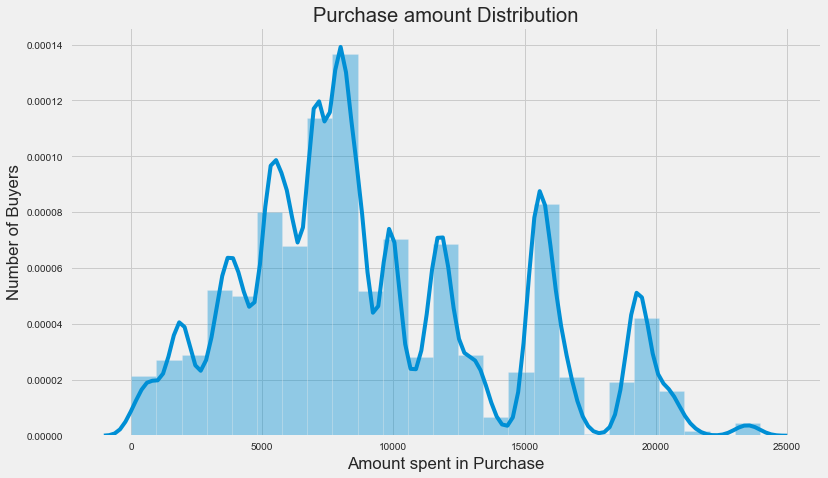

In [19]:
#univariate analysis #check analytics vidhya bookmark
#distribution of the target variable purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)  # hist+kdeplot+rugplot
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

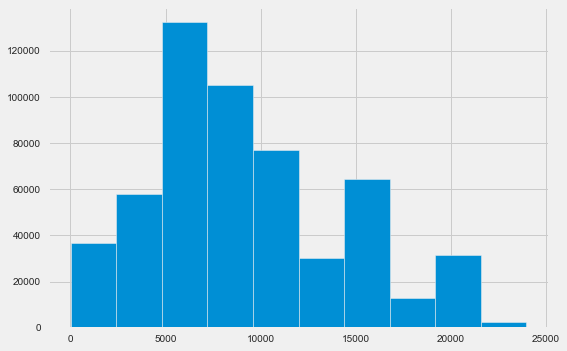

In [20]:
train['Purchase'].hist()

In [21]:
train['Purchase'].mean()

9263.968712959126

In [22]:
train['Purchase'].median() # with difference in mean and median we can predict data distribution like skewed or normal distribution

8047.0

In [ ]:
# the above diagram shows that the data is distributed with normal distribution or so called guassian distribution

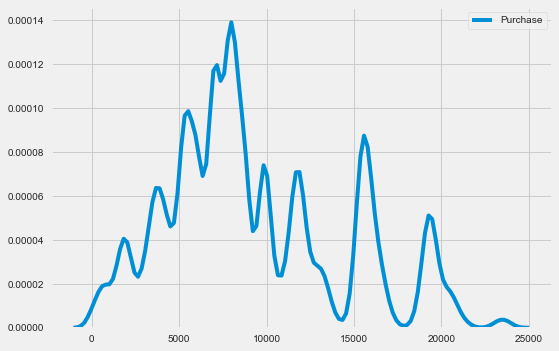

In [23]:
sns.kdeplot(train['Purchase'])  #KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

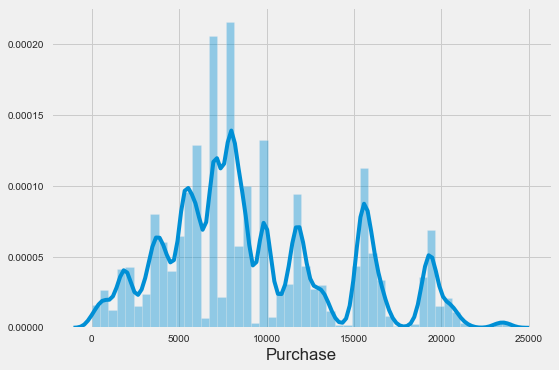

In [24]:
sns.distplot(train['Purchase']) #hist=false shows kde plot in distplot

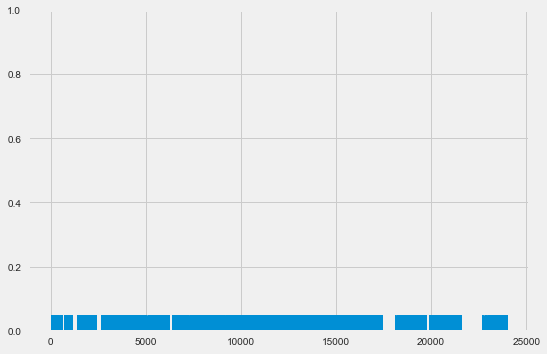

In [25]:
sns.rugplot(train['Purchase']) #A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.

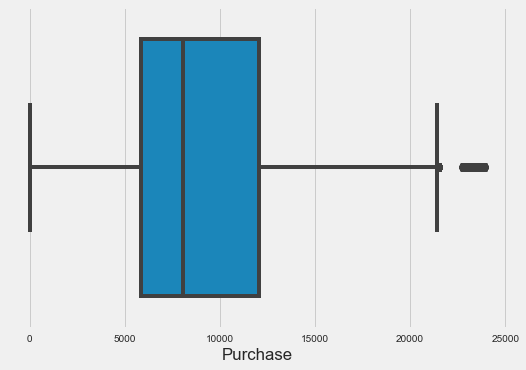

In [26]:
sns.boxplot(train['Purchase'])

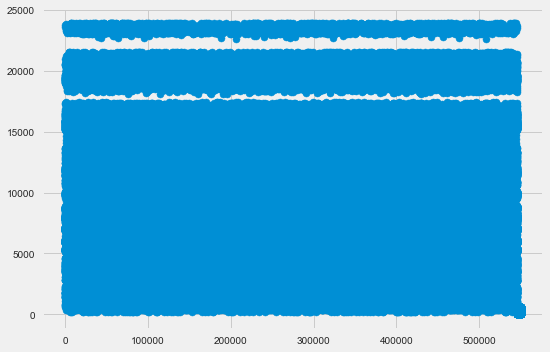

In [27]:
plt.scatter(train.index,train['Purchase'])

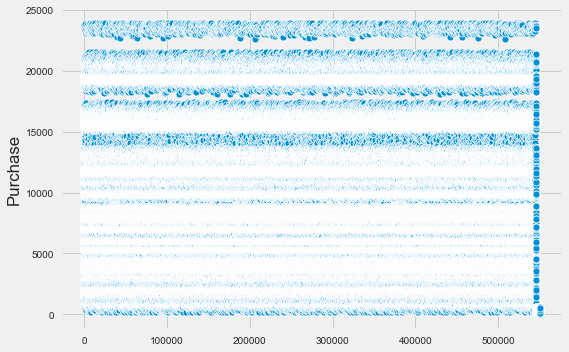

In [28]:
sns.scatterplot(x=train.index,y=train['Purchase']) #change hue for variety distribution

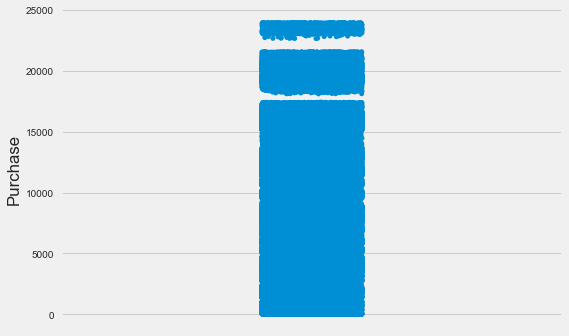

In [29]:
sns.stripplot(y=train['Purchase'])

In [30]:
# checking for skewness and kurtos
print ('Skew is:', train.Purchase.skew()) #measures the relative size of the two tails. called departure from the horizontal symetry
print('Kurtosis: %f' % train.Purchase.kurt())  #Kurtosis is a measure of the combined sizes of the two tails.
#It measures the amount of probability in the tails. 
#The value is often compared to the kurtosis of the normal distribution, which is equal to 3. it forms the more precise evaluation of data

Skew is: 0.6001400037087128
Kurtosis: -0.338378


In [31]:
#Numerical Predictors
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


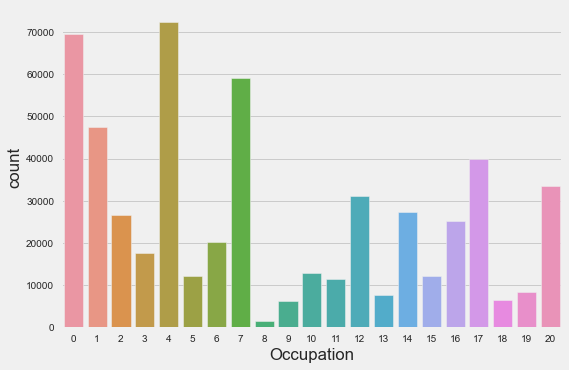

In [33]:
# Distribution of the variable Occupation
sns.countplot(train['Occupation'])

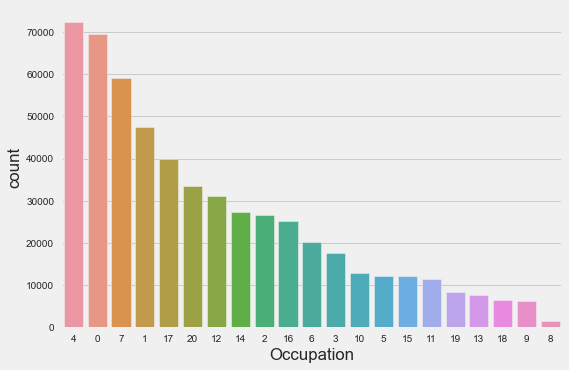

In [34]:
sns.countplot(x = 'Occupation',data = train,order = train['Occupation'].value_counts().index) # for arrange in ascending order

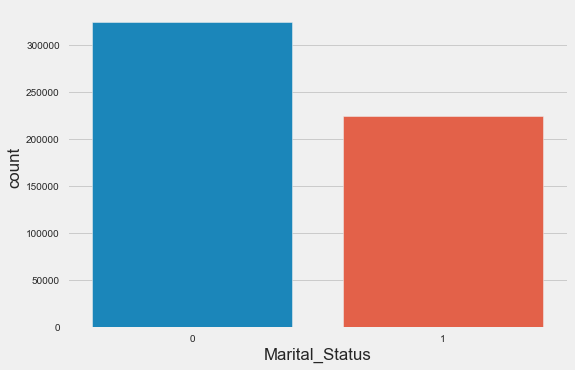

In [35]:
#distribution of variable marital status
sns.countplot(x = 'Marital_Status',
              data = train,
              order = train['Marital_Status'].value_counts().index)

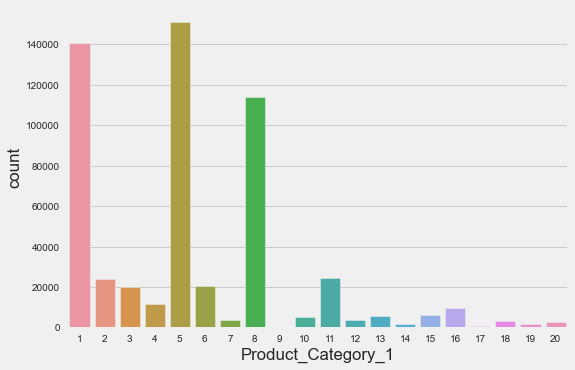

In [36]:
#Distribution of the variable Product_Category_1
sns.countplot(train['Product_Category_1'])

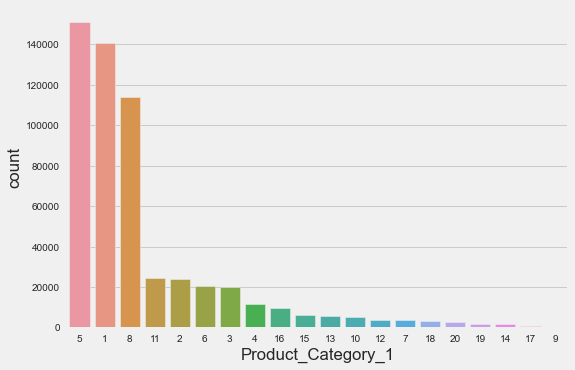

In [37]:
sns.countplot(x = 'Product_Category_1',
              data = train,
              order = train['Product_Category_1'].value_counts().index)

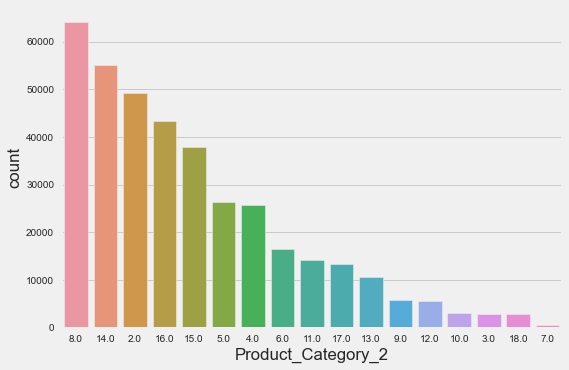

In [38]:
sns.countplot(x = 'Product_Category_2',
              data = train,
              order = train['Product_Category_2'].value_counts().index)

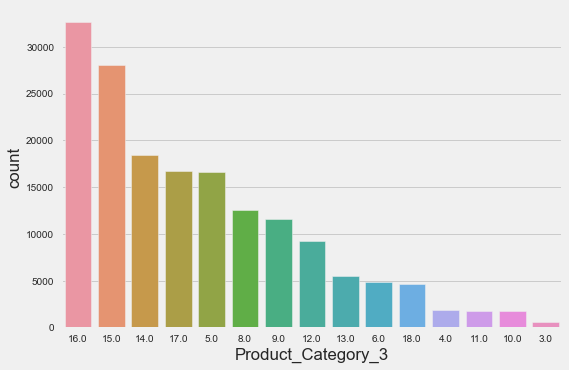

In [39]:
sns.countplot(x = 'Product_Category_3',
              data = train,
              order = train['Product_Category_3'].value_counts().index)

In [40]:
#Correlation between Numerical Predictors and Target variable
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


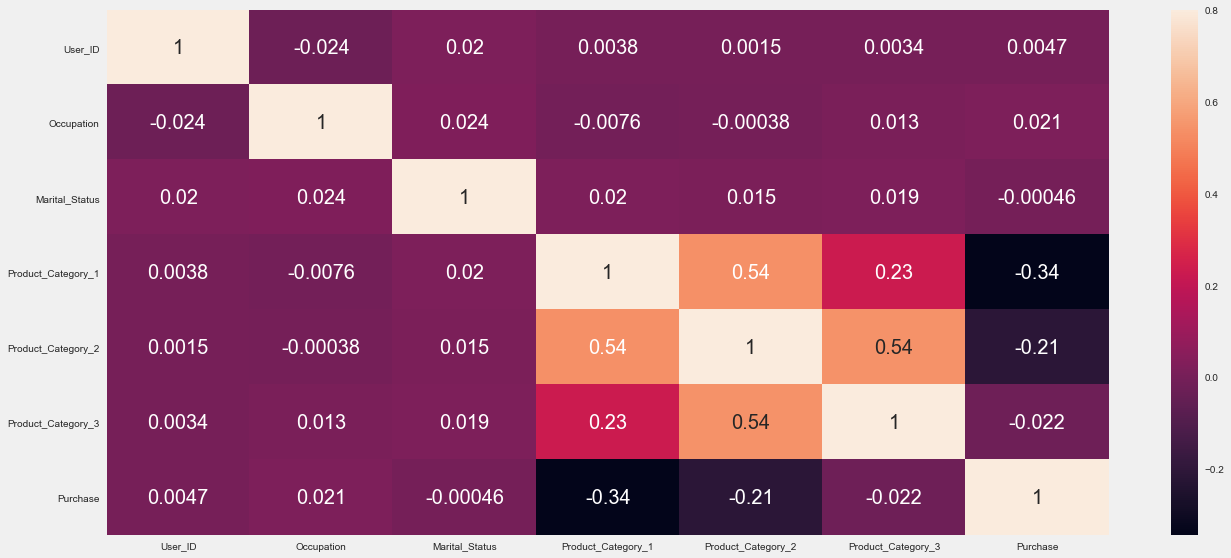

In [41]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

In [42]:
# Categorical Predictors

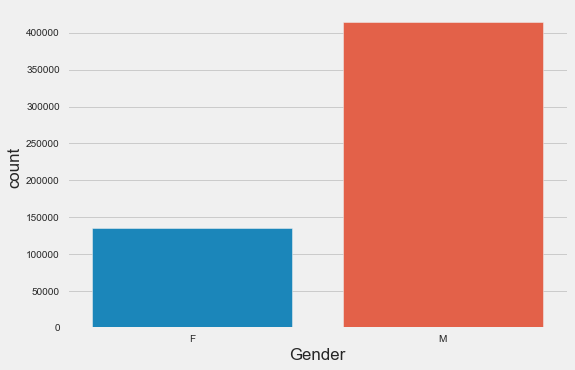

In [43]:
#Distribution of the variable Gender
sns.countplot(train['Gender'])

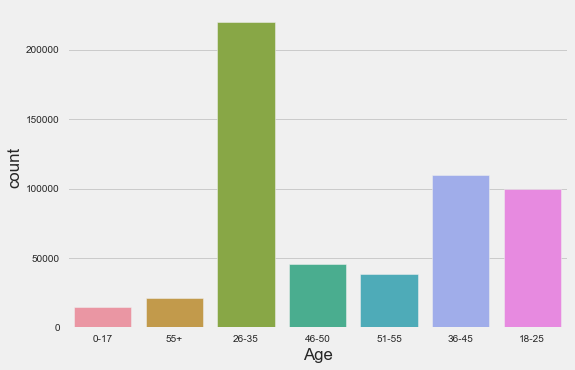

In [44]:
#distribution of variable age
sns.countplot(train['Age'])

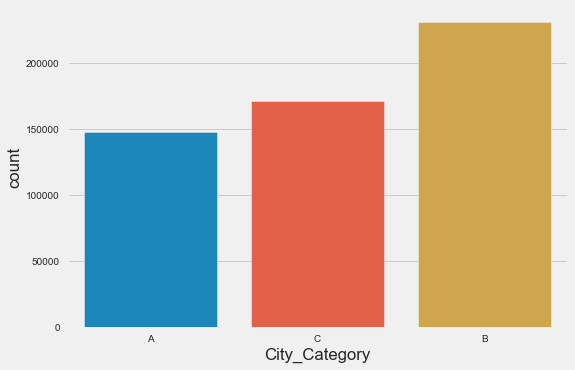

In [45]:
#Distribution of the variable City_Category
sns.countplot(train['City_Category'])

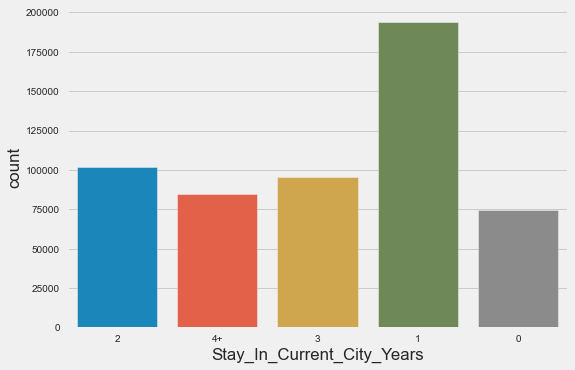

In [46]:
#Distribution of the variable Stay_In_Current_City_Years
sns.countplot(train['Stay_In_Current_City_Years'])

In [47]:
#Bivariate Analysis:Firstly we individually analysed some of the existent features, 
#now it is time to understand the relationship between our target variable and predictors,
# as well as the relationship among predictors.

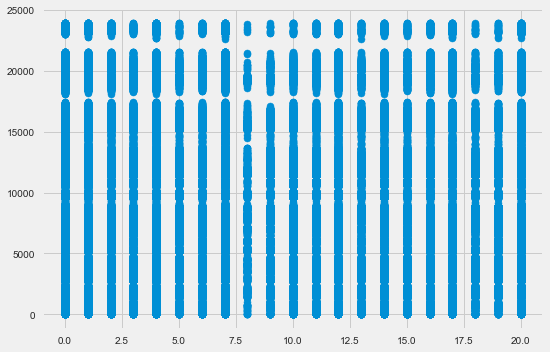

In [48]:
#Numerical Variables
#occupation and purchase analysis
plt.scatter(x='Occupation',y='Purchase',data=train)

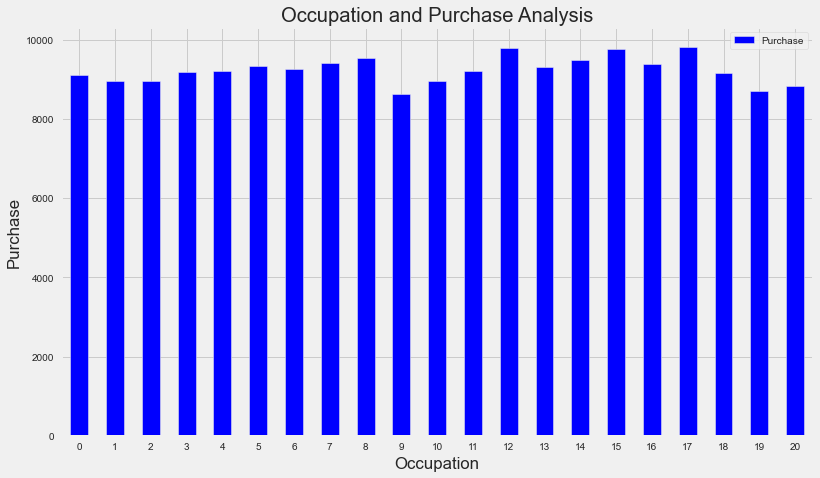

In [49]:
#spreading data of two numeriacal variable with pivot_Tables
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [50]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

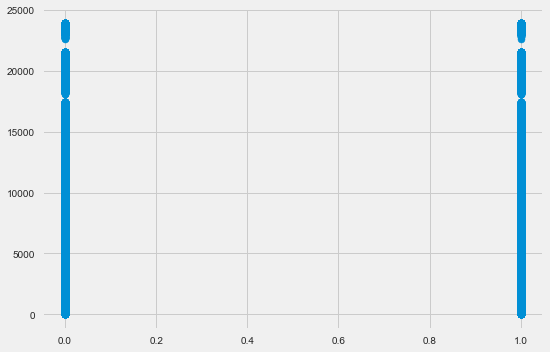

In [51]:
#Marital_Status and Purchase analysis
plt.scatter(x='Marital_Status',y='Purchase',data=train)

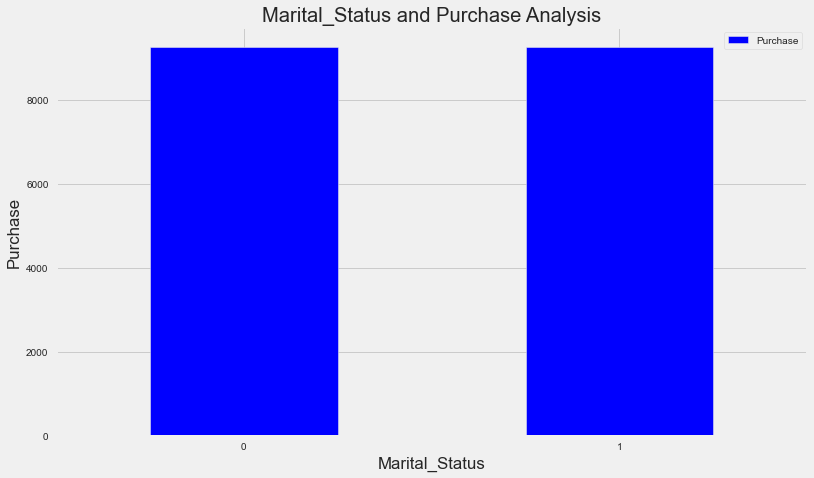

In [52]:
Marital_Status_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

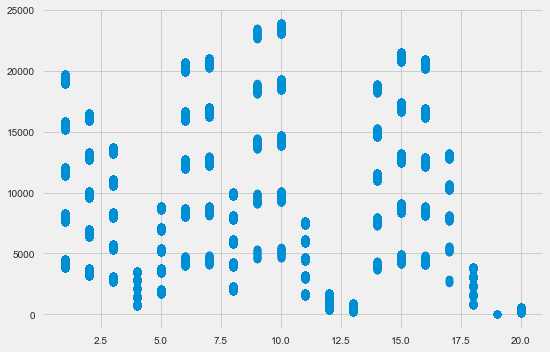

In [53]:
plt.scatter(x='Product_Category_1',y='Purchase',data=train) # on the basis of average spent, also look for amount spent on purchase

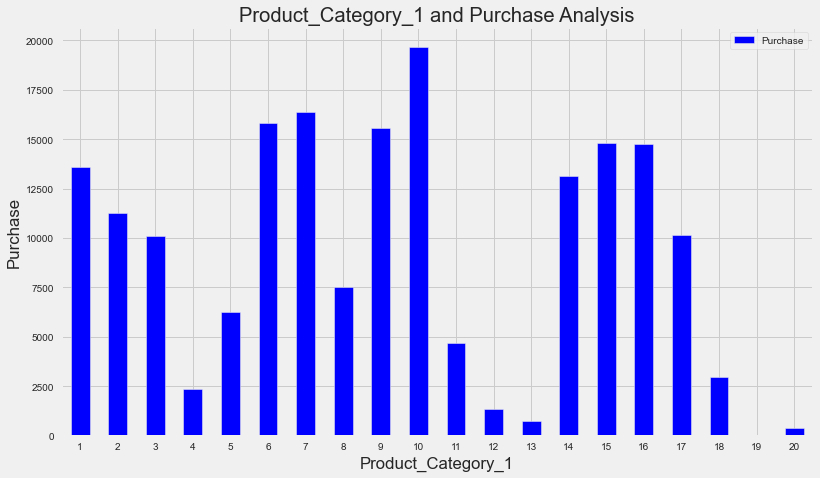

In [54]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values='Purchase', aggfunc=np.mean)     
#average spent
Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

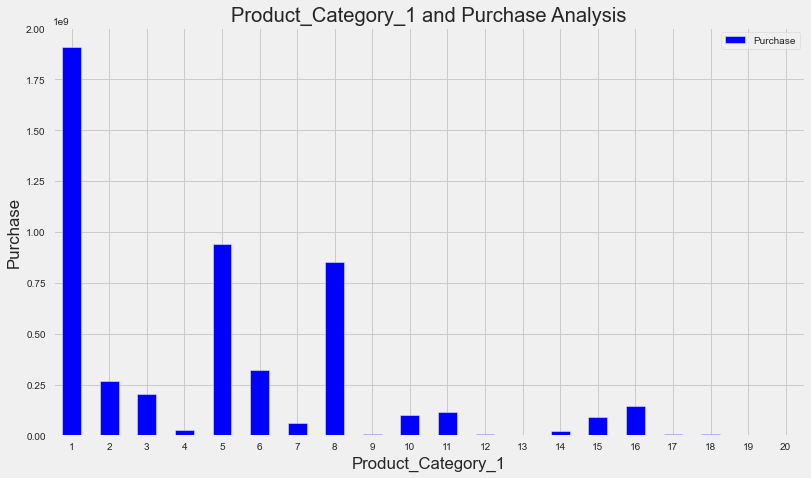

In [55]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)
#amount spent
Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

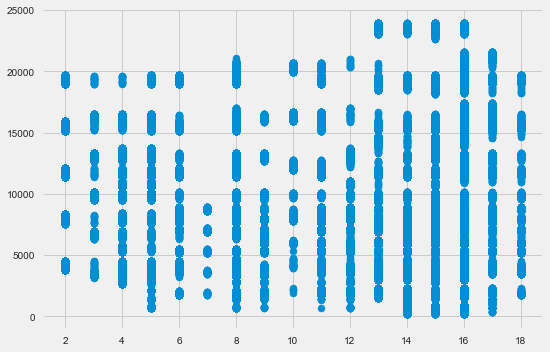

In [56]:
plt.scatter(x='Product_Category_2',y='Purchase',data=train) 

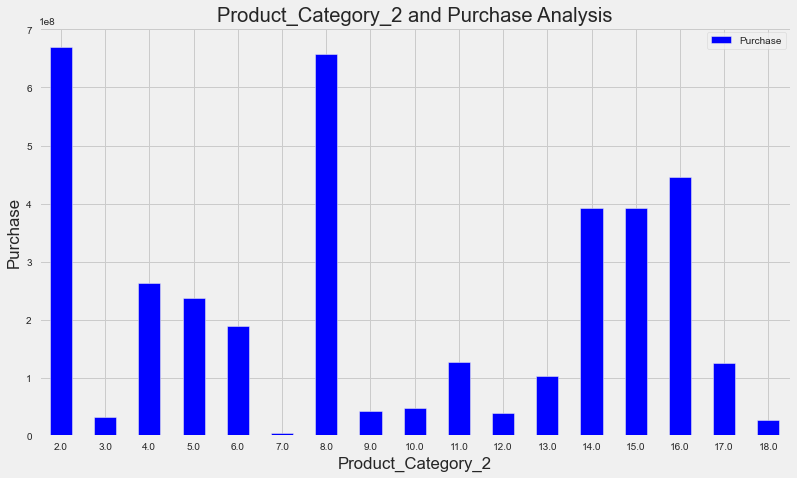

In [57]:
#Product_Category_2 and Purchase Analysis
Product_category_1_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

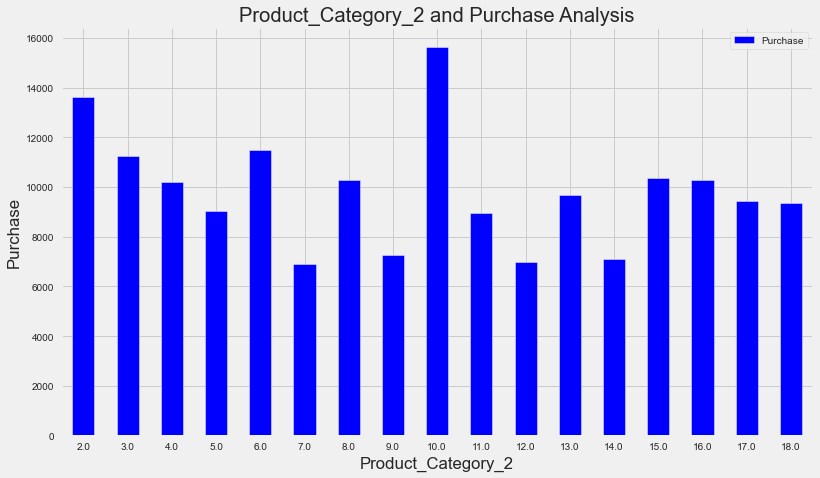

In [58]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

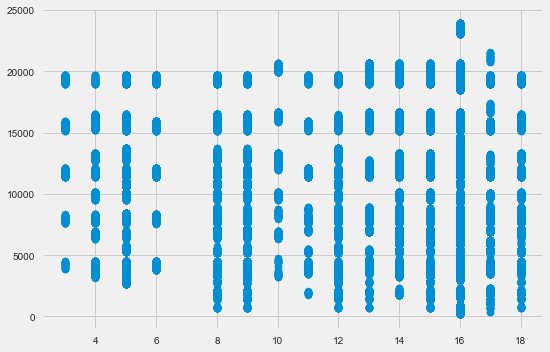

In [59]:
plt.scatter(x='Product_Category_3',y='Purchase',data=train)

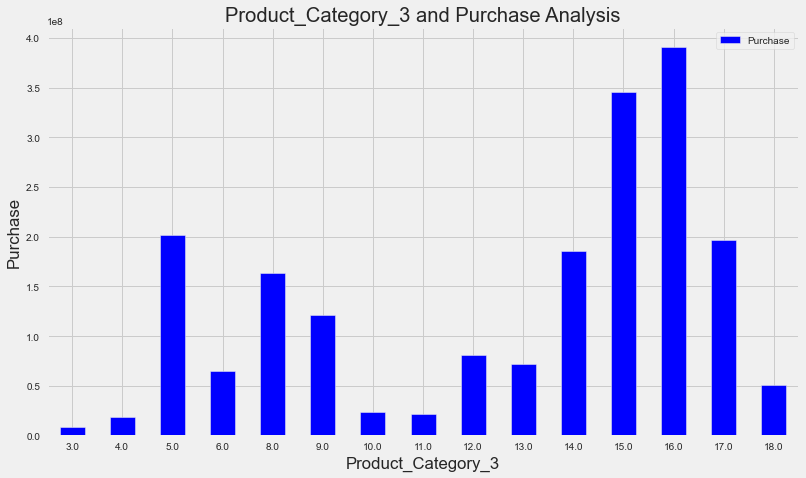

In [60]:
#Product_Category_3 and Purchase Analysis
Product_category_1_pivot = \
train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

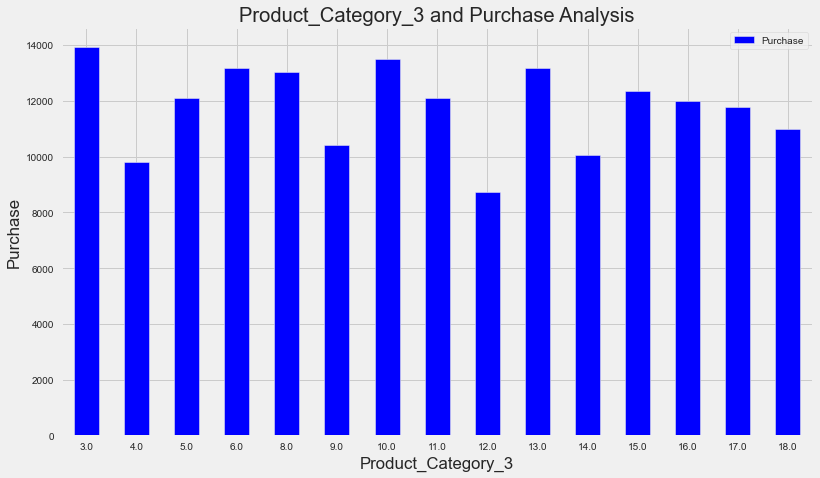

In [61]:
Product_category_1_pivot = \
train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [62]:
#Categorical Variables

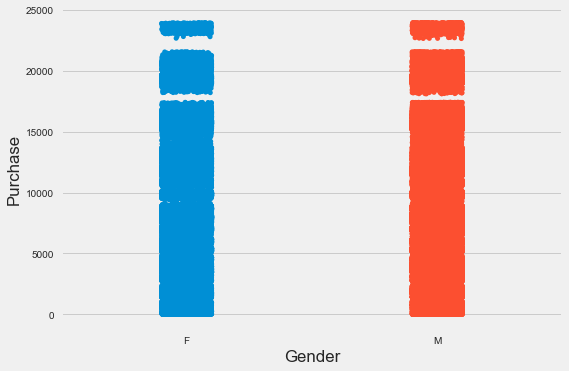

In [63]:
 #Gender and Purchase analysis
sns.stripplot(x="Gender", y="Purchase", data=train)

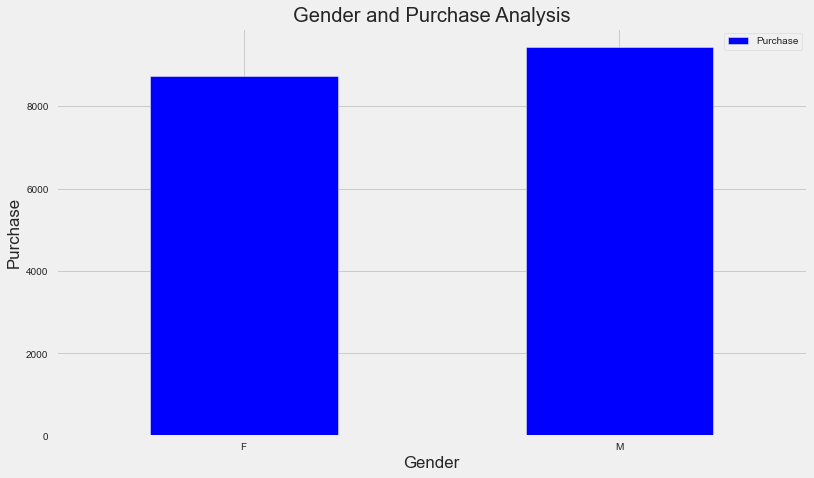

In [64]:
Product_category_1_pivot = \
train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [65]:
#sns.swarmplot(x="Gender", y="Purchase", data=train)

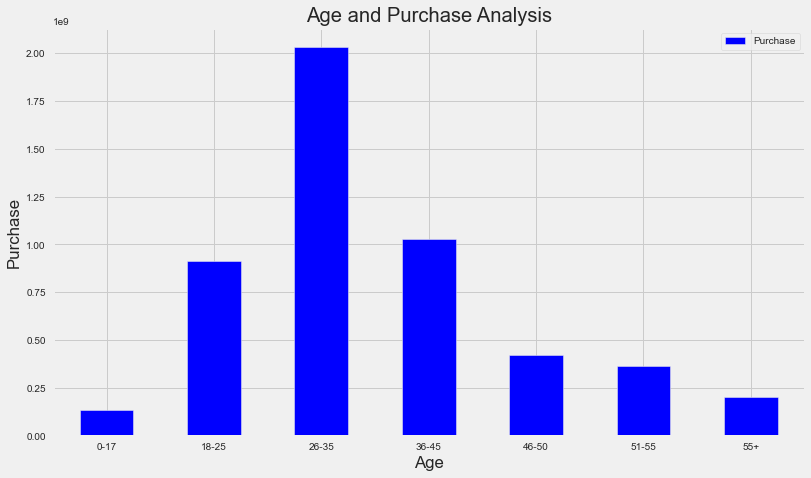

In [66]:
#Age and Purchase analysis
Product_category_1_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

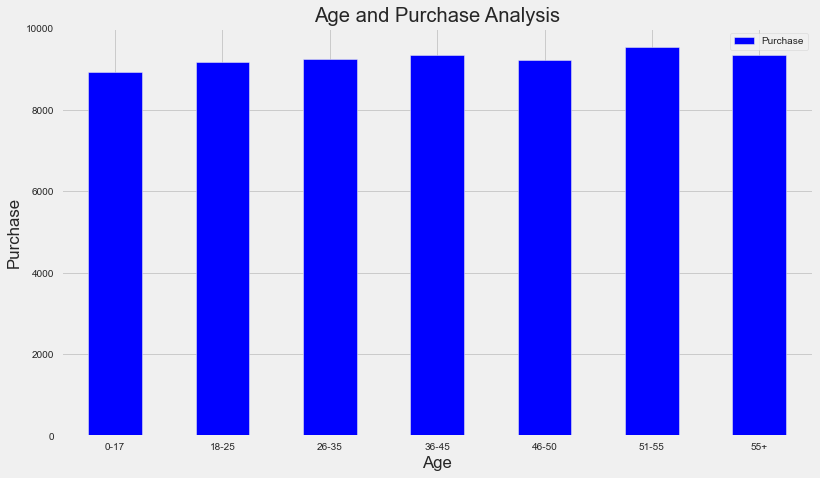

In [67]:
Product_category_1_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

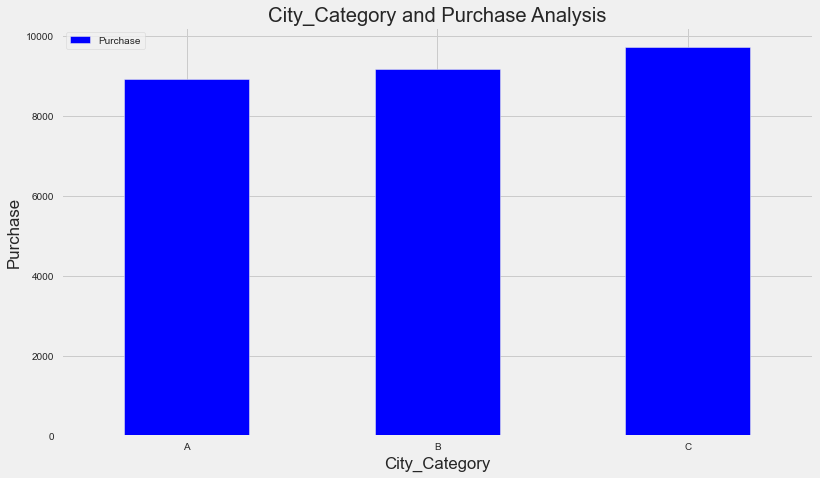

In [68]:
#city_category and purchase analysis
Product_category_1_pivot = \
train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

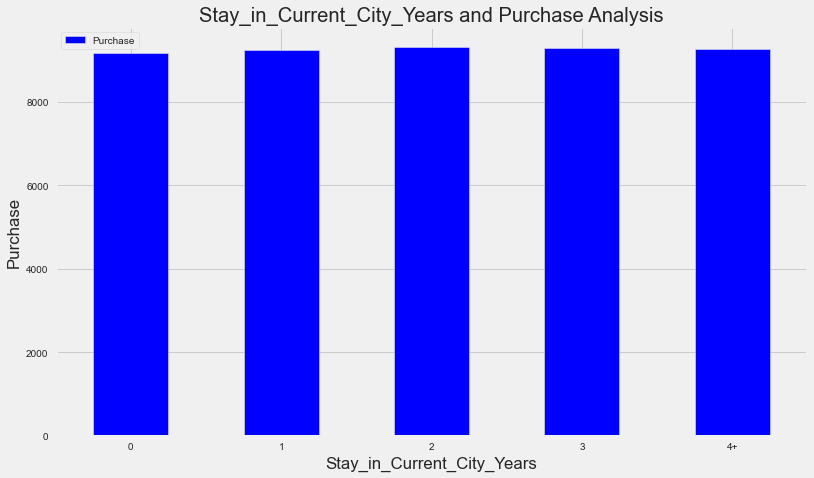

In [69]:
#Stay_in_Current_City_Years and Purchase Analysis
Product_category_1_pivot = \
train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# Data Preprocessing

In [70]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True, sort = False)

print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [71]:
#looking for missing values
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [72]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [73]:
#Numerical Values

In [74]:
#imputing the values with 0
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(-2.0).astype("float")

In [75]:
data.Product_Category_2.value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [76]:
data['Product_Category_3']= \
data['Product_Category_3'].fillna(-2.0).astype('float')
data.Product_Category_3.value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

In [79]:
train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [80]:
#Removing Product_Category_1 group 19 and 20 from Train
#Get index of all columns with product_category_1 equal 19 or 20 from train
condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == 'train')]
data = data.drop(condition)

In [ ]:
#Categorical Values

In [81]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3672
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17996
source                            2
dtype: int64

In [ ]:
#frequency analysis

In [82]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = data.select_dtypes(include=['object']).columns.drop(['source'])
#Print frequency of categories
for col in category_cols:
 #Number of times each value appears in the column
 frequency = data[col].value_counts()
 print("\nThis is the frequency distribution for " + col + ":")
 print(frequency)


This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00063642       1
P00132742       1
P00057842       1
P00305542       1
P00308042       1
Name: Product_ID, Length: 3672, dtype: int64

This is the frequency distribution for Gender:
M    587052
F    192462
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    311554
36-45    155898
18-25    141209
46-50     64902
51-55     54450
55+       30316
0-17      21185
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    328524
C    241487
A    209503
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     274937
2     144599
3     134750
4+    120054
0     105174
Name: Stay_In_Current_City_Years, dtype: int64


# Feature engineering

In [83]:
#converting gender to binary
#Turn gender binary
gender_dict = {'F':0, 'M':1}
data['Gender'] = data['Gender'].apply(lambda line: gender_dict[line])
data['Gender'].value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

In [84]:
data['Age'].value_counts()

26-35    311554
36-45    155898
18-25    141209
46-50     64902
51-55     54450
55+       30316
0-17      21185
Name: Age, dtype: int64

In [85]:
#Converting Age to numeric values
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

In [86]:
data['City_Category'].value_counts()

B    328524
C    241487
A    209503
Name: City_Category, dtype: int64

In [87]:
#convert city category to binary
city_dict = {'A':0, 'B':1, 'C':2}
data['City_Category'] = data['City_Category'].apply(lambda line: city_dict[line])
data['City_Category'].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

In [88]:
#Converting Stay_In_Current_City_Years to binary
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [89]:
#function to create count features
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [ ]:
#Creating all the features:
#data["User_ID_Count"]  = getCountVar(data, data, "User_ID")
data["Age_Count"]  =getCountVar(data, data, "Age")
data["Occupation_Count"]  =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"]  =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"]  =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"]  =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"]  =getCountVar(data, data, "Product_ID")

In [ ]:
#Exporting Data

In [ ]:
#Divide into test and train:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

# 4. Model  Building

In [ ]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv',header=None)

In [ ]:
#Since I’ll be making many models, instead of repeating the codes again and again, 
#I would like to define a generic function which takes the algorithm and data as input and makes the model, 
#performs cross-validation and generates submission.

In [ ]:
'''
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn.model_selection import train_test_split
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)
    '''

In [ ]:
'''
#linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')
'''

In [ ]:
#coef1 = pd.Series(LR.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

In [ ]:
train_df.head()

In [ ]:
train_df.columns

In [ ]:
train_df.shape

In [ ]:
train_df.isnull().count()

In [ ]:
train_df.head()

In [ ]:
test_df.head(10)

In [ ]:
X = train_df.iloc[:,2:21]
#X=train_df.drop(['Purchase'],axis=1)
#X1=X.drop(['Product_ID'],axis=1)
#X2=X1.drop(['User_ID'],axis=1)

In [ ]:
#predictors = X.columns.drop(['Product_ID','User_ID'])
#predictors

In [ ]:
X

In [ ]:
y = train_df.iloc[:,-1:]
#Y=train_df['Purchase']

In [ ]:
y

In [ ]:
#splitting data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
print('Intercept =', regressor.intercept_)
print('Coefficient =', regressor.coef_)
accuracy = (regressor.score(X_test,y_test))
print(accuracy)

In [ ]:
rmse_reg=np.sqrt(np.mean((y_test-y_pred)**2))
print('Tentative RMSE linear regression:{}'.format(rmse_reg))

In [ ]:
Y_train=train_df['Purchase']

In [ ]:
Y_train

In [ ]:
predictors = test_df.columns.drop(['Product_ID','User_ID'],axis=1)

In [ ]:
#building the model on entire dataset
regressor.fit(X2,Y_train)
submit['Purchase']=regressor.predict(predictors)

In [ ]:
submit.to_csv('Black_friday_sales_pred.csv',index=False)

In [ ]:
#ridge regression model
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

In [ ]:
#decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

In [ ]:
#random forest regressor model
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [ ]:
#XgBoost model
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

In [ ]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
    IDcol.append(target)
    submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
    submission.to_csv("XGBoos.csv", index=False)

In [ ]:
#bookmark